# Example of L1C file reader

## Load the library

In [1]:
# automatic reload option for IPython
from IPython import get_ipython
ipython = get_ipython()
if '__IPYTHON__' in globals():
    ipython.magic('load_ext autoreload')
    ipython.magic('autoreload 2')

# from src.nasa_pace_data_reader import L1
from nasa_pace_data_reader import L1
from nasa_pace_data_reader import plot
import numpy as np
from matplotlib import pyplot as plt
from netCDF4 import Dataset

### Read the netCDF4 file

Specify the filename and location of netCDF file

In [2]:
# Location of the file
fileName = '/Users/aputhukkudy/Downloads/PACE_HARP2.20220321T101844.L1C.5.2KM.V03.SIM2.1_.nc'

# Read the file
l1c = L1.L1C()
l1c_dict = l1c.read(fileName)

Reading HARP2 data from /Users/aputhukkudy/Downloads/PACE_HARP2.20220321T101844.L1C.5.2KM.V03.SIM2.1_.nc


### Print the keys
Print the keys of loaded dict


In [3]:
# Print the keys and the shape of the data
[print(key, l1c_dict[key].shape) for key in l1c_dict.keys()]

latitude (395, 519)
longitude (395, 519)
scattering_angle (395, 519, 90)
solar_zenith_angle (395, 519, 90)
solar_azimuth_angle (395, 519, 90)
sensor_zenith_angle (395, 519, 90)
sensor_azimuth_angle (395, 519, 90)
i (395, 519, 90, 1)
q (395, 519, 90, 1)
u (395, 519, 90, 1)


[None, None, None, None, None, None, None, None, None, None]

### Plotting the 'I'

In this section we have shown an example of plotting 'i'

setting dpi to %dppi 300


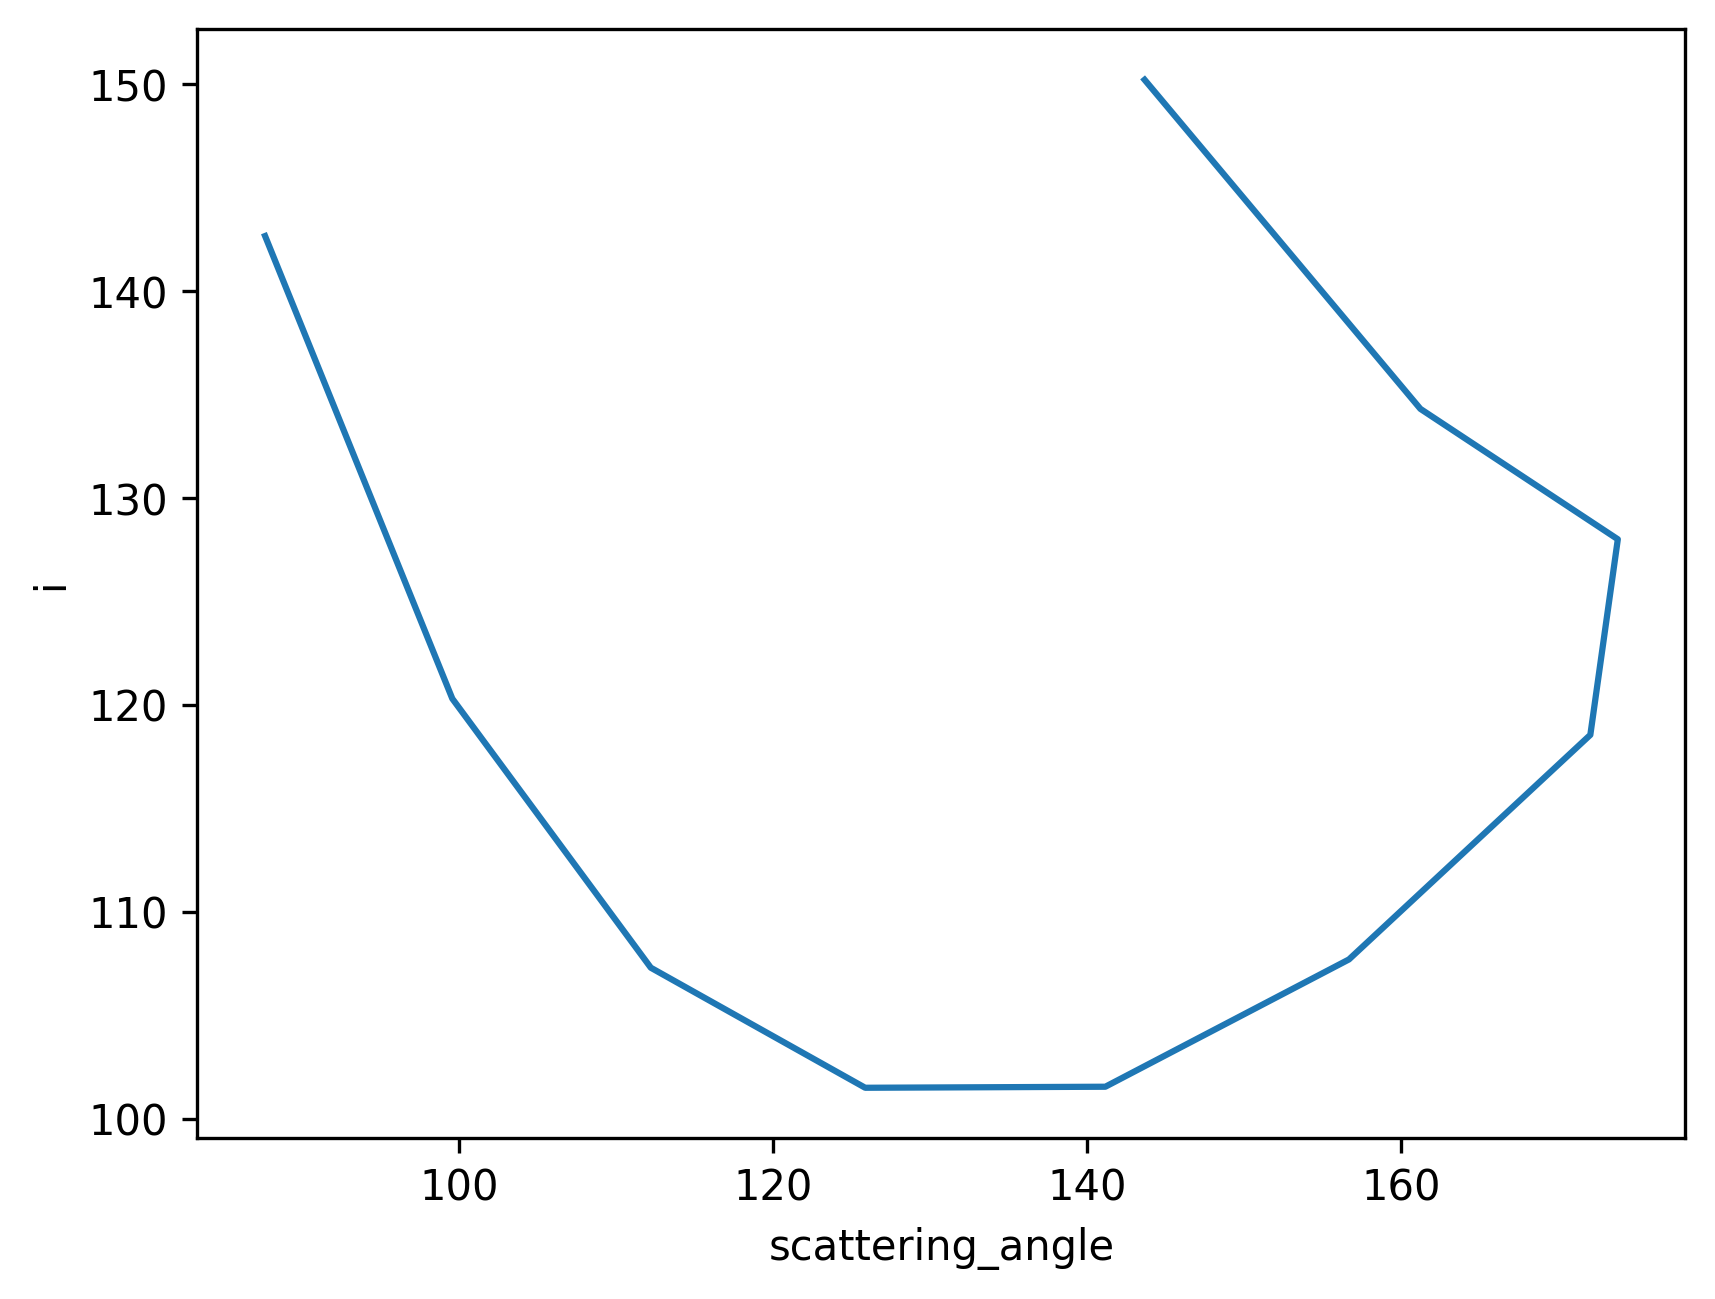

In [4]:
# Load the plot class
plt_ = plot.Plot(l1c_dict)

# Set the dpi
plt_.setDPI(300)

# Plot the pixel
plt_.plotPixel(250,300)